Import all the required framework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WineQT.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Note:EDA implementation is skipped in this pipeline.

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

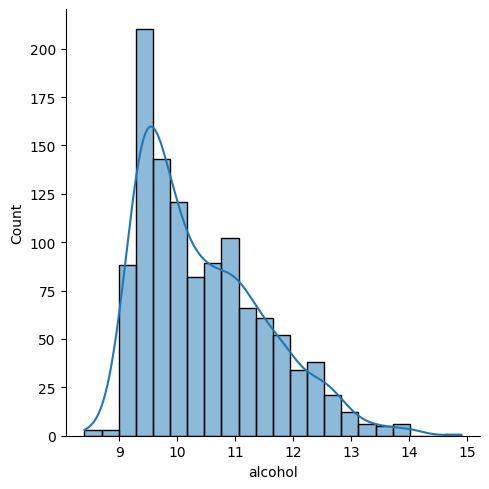

In [5]:
sns.displot(data['alcohol'], kde=True)


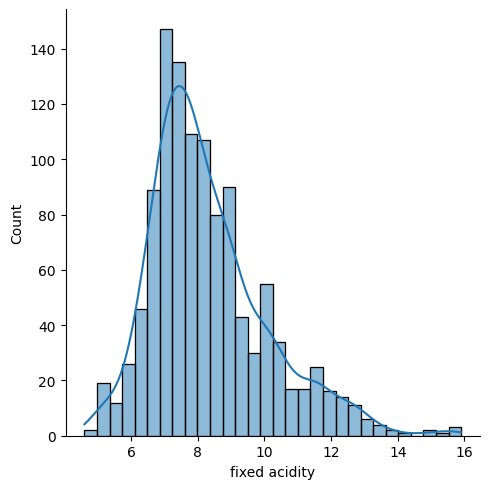

In [6]:
sns.displot(data['fixed acidity'], kde=True)


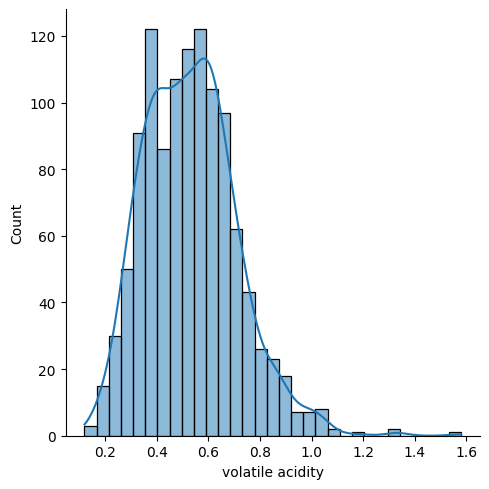

In [7]:
sns.displot(data['volatile acidity'], kde=True)


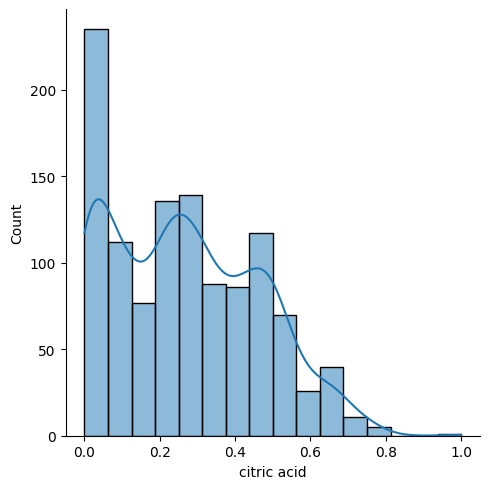

In [8]:
sns.displot(data['citric acid'], kde=True)


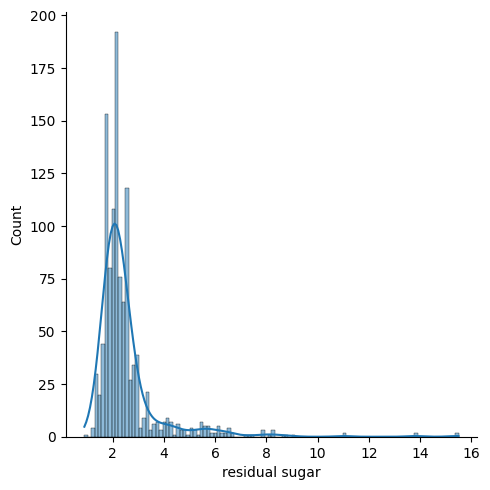

In [9]:
sns.displot(data['residual sugar'], kde=True)


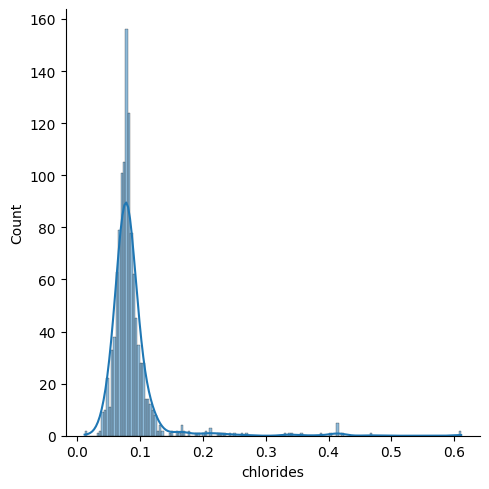

In [10]:
sns.displot(data['chlorides'], kde=True)


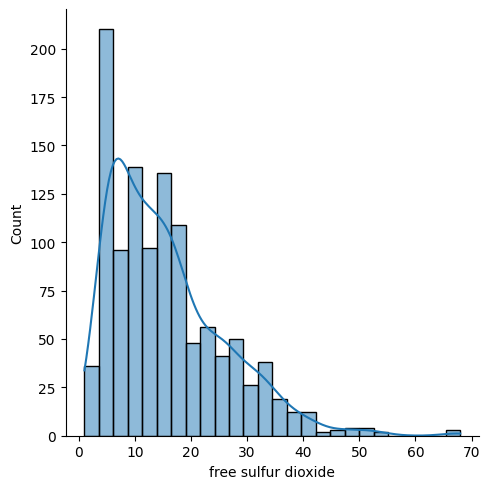

In [12]:
sns.displot(data['free sulfur dioxide'], kde=True)


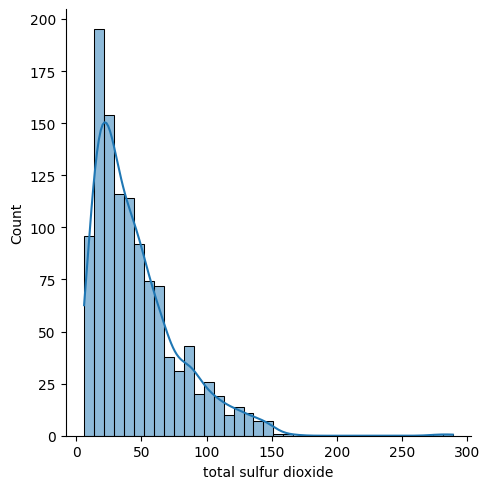

In [13]:
sns.displot(data['total sulfur dioxide'], kde=True)


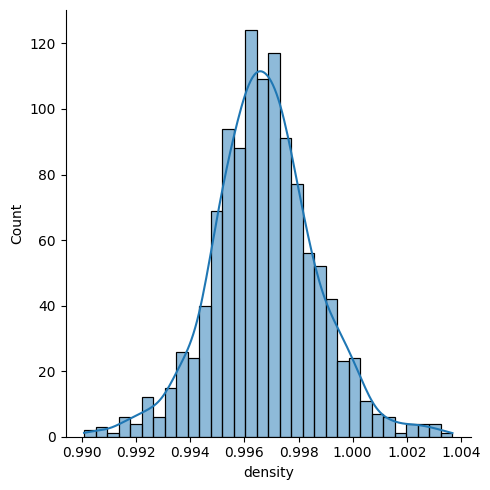

In [14]:
sns.displot(data['density'], kde=True)


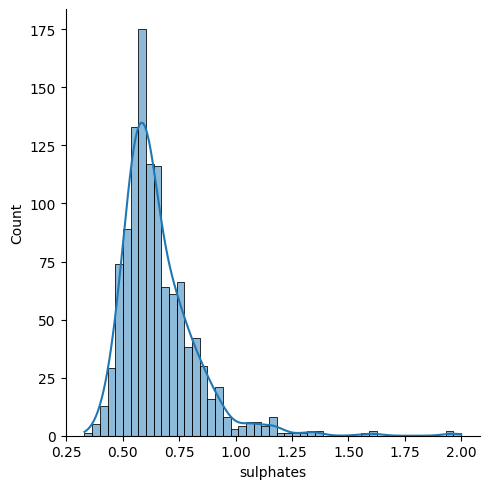

In [15]:
sns.displot(data['sulphates'], kde=True)


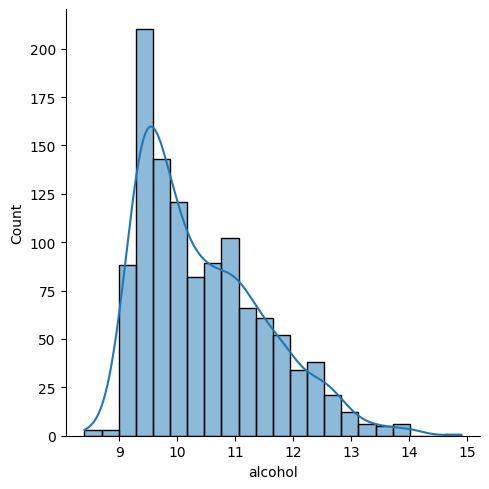

In [16]:
sns.displot(data['alcohol'], kde=True)


In [18]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [40]:
X = data.drop('quality',axis=1)
X = data.drop('Id',axis=1)
y= data['quality']

In [42]:
X.shape

(1143, 12)

In [43]:
y.shape

(1143,)

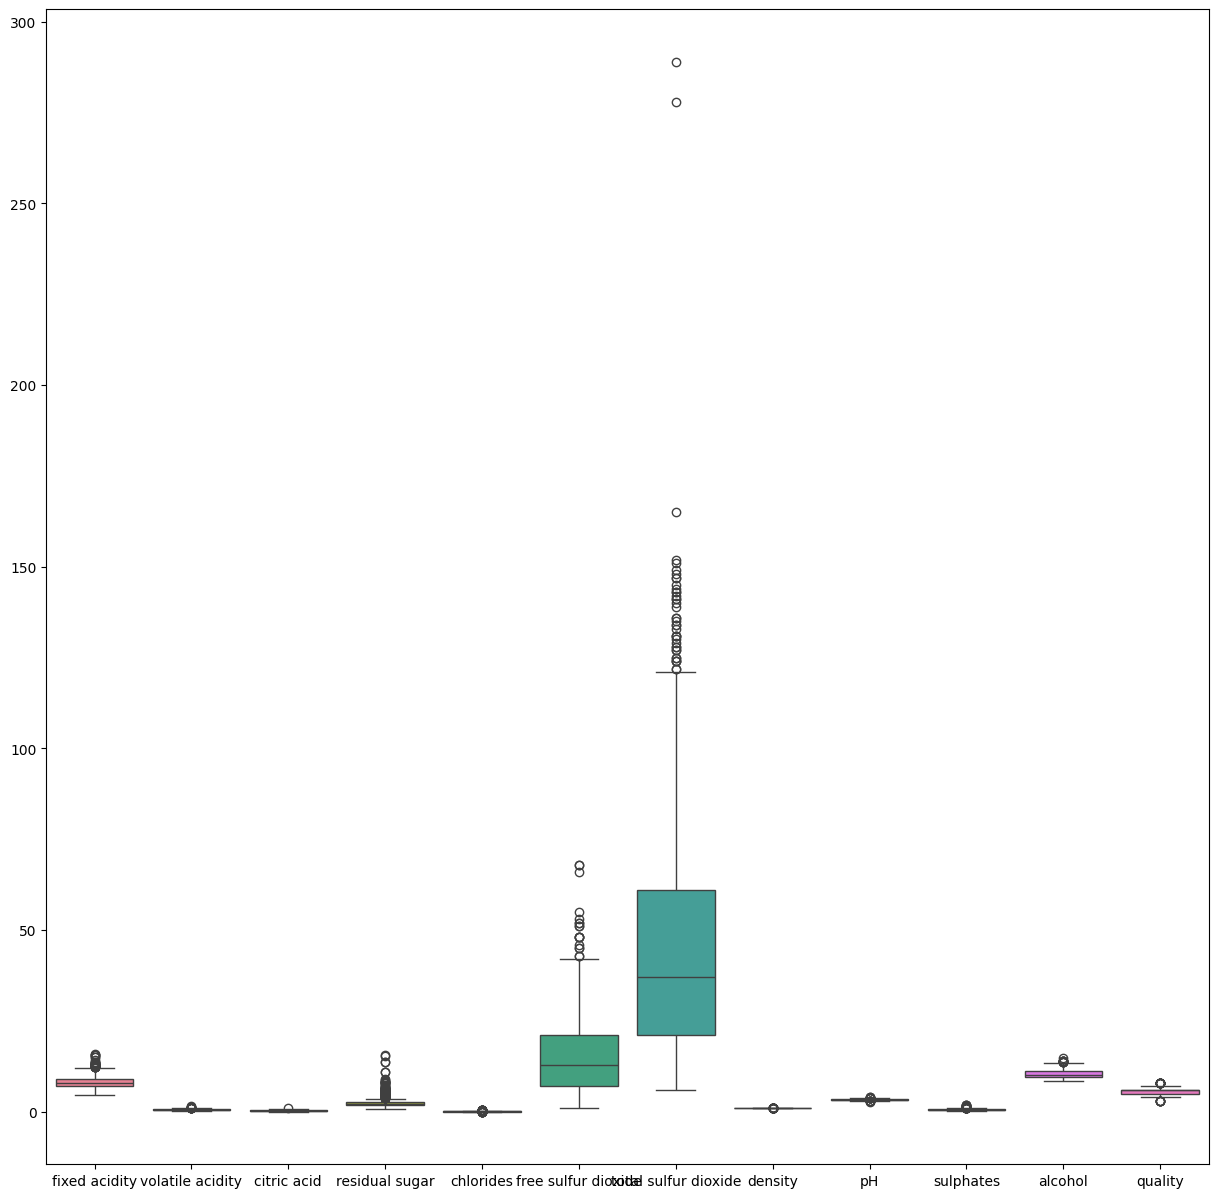

In [44]:
fig,ax = plt.subplots(figsize=(15,15))
sns.boxplot(data=X,ax=ax)
plt.savefig('boxplot.jpg')

In [45]:
mask = pd.Series(True, index=X.index)  # Start with all rows included

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
for col in cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask = (X[col] >= lower_bound) & (X[col] <= upper_bound)

In [46]:
X_outliers_detection = X[mask]
y_outliers_detection = y[mask]

In [47]:
y_outliers_detection.shape

(1131,)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_outliers_detection)


In [26]:
X_outliers_detection = data.drop('Id', axis=1)

In [29]:
X_outliers_detection.shape

(1143, 12)

In [30]:
y_outliers_detection.shape

(1131,)

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_outliers_detection, y_outliers_detection, test_size=0.33, random_state=42)

In [49]:
y_outliers_detection.value_counts()

5    482
6    457
7    138
4     33
8     15
3      6
Name: quality, dtype: int64

In [50]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.predict(X_test)


array([6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6,
       6, 6, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6,
       6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6,
       5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6,

In [51]:
svm_classifier.score(X_test, y_test)

0.5133689839572193

Hyperparameter tuning: GridSearchCV or RandomizedSearchCV

In [53]:
param_grid ={
    'C':[0.1,1,10,100],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto'],
    'degree':[2,3,4]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(svm_classifier,param_grid,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [54]:
grid_search.best_params_

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [61]:
svm_classifier_optimized = SVC(C=1, degree=2, gamma='scale', kernel='linear')
svm_classifier_optimized.fit(X_train, y_train)

SVC(C=1, degree=2, kernel='linear')

In [62]:
svm_classifier_optimized.score(X_test, y_test)

1.0

In [65]:
y_predictions = svm_classifier_optimized.predict(X_test)


In [68]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00       170
           6       1.00      1.00      1.00       151
           7       1.00      1.00      1.00        40
           8       1.00      1.00      1.00         4

    accuracy                           1.00       374
   macro avg       1.00      1.00      1.00       374
weighted avg       1.00      1.00      1.00       374

